# IMPORT LIBRARY

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# MEMBACA FILE GAMBAR

In [2]:
img = cv2.imread('Citra_Renata.png')

# MELIHAT UKURAN CITRA

In [3]:
img.shape

(1537, 2730, 3)

# MEMBUAT BARIS DAN KOLOM

In [4]:
[baris, kolom] = img.shape[:2]

# MENGUBAH BGR TO RGB

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# MEMBUAT CITRA KONTRAS DAN HISTOGRAM

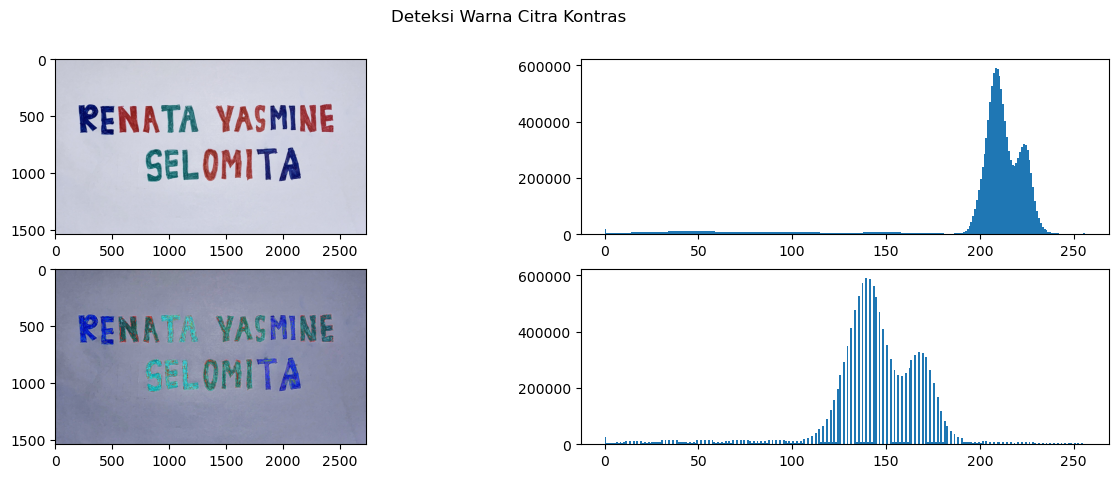

In [6]:
alpha = 1.9
citra_kontras = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gmx = img[x,y] * alpha
        citra_kontras[x,y]= gmx

citra_kontras = citra_kontras.astype(np.uint8)

#menampilkan
fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,256])
axs[1,0].imshow(citra_kontras)
axs[1,1].hist(citra_kontras.ravel(), 256, [0,256])

fig.suptitle("Deteksi Warna Citra Kontras")

plt.show()

# DETEKSI WARNA MERAH DAN HISTOGRAM

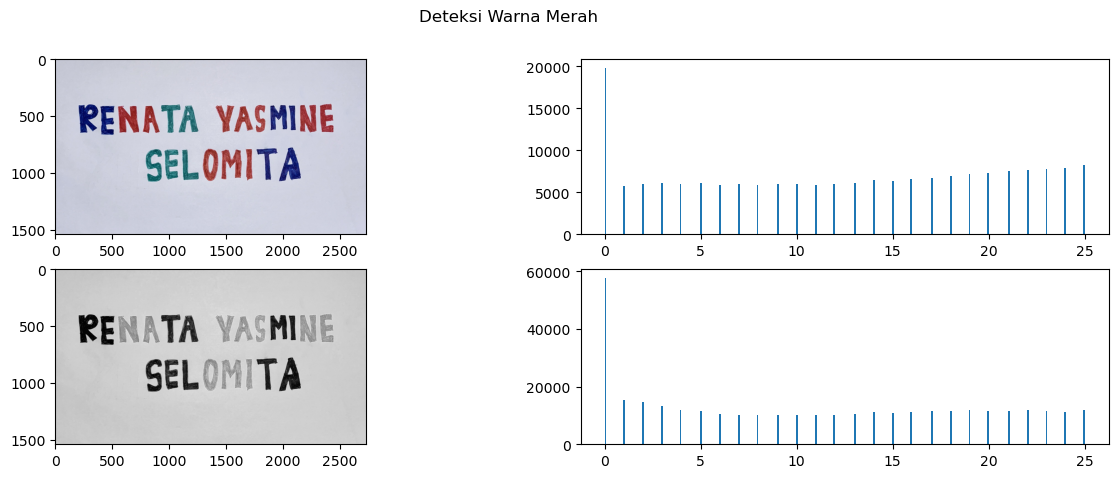

In [7]:
channel_red = img[:,:,0]
citra_merah = cv2.merge([channel_red, channel_red, channel_red])

fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,25])
axs[1,0].imshow(citra_merah)
axs[1,1].hist(citra_merah.ravel(), 256, [0,25])

fig.suptitle("Deteksi Warna Merah")

plt.show()

# DETEKSI WARNA HIJAU DAN HISTOGRAM

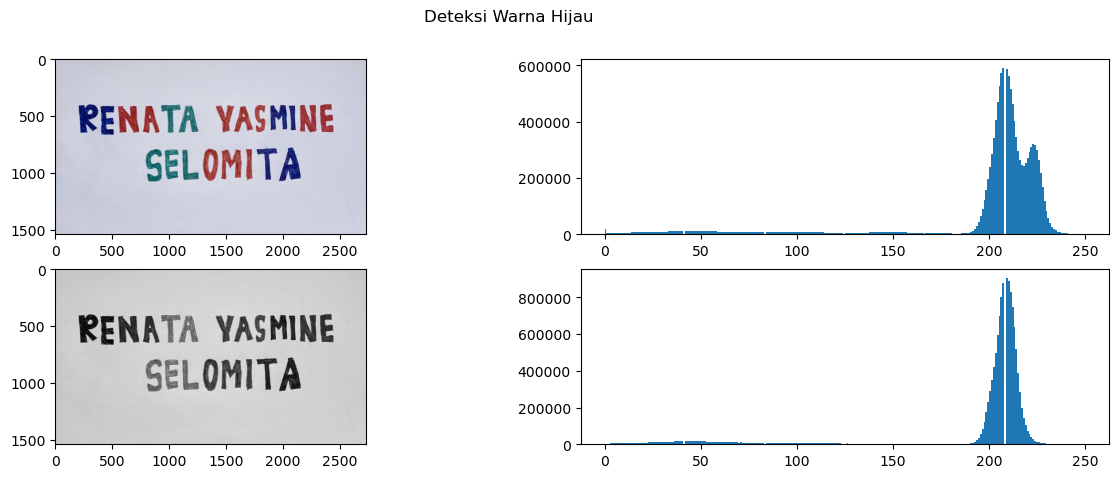

In [8]:
channel_green = img[:,:,1]
citra_hijau = cv2.merge([channel_green, channel_green, channel_green])

fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,250])
axs[1,0].imshow(citra_hijau)
axs[1,1].hist(citra_hijau.ravel(), 256, [0,250])

fig.suptitle("Deteksi Warna Hijau")

plt.show()

# DETEKSI WARNA BIRU DAN HISTOGRAM

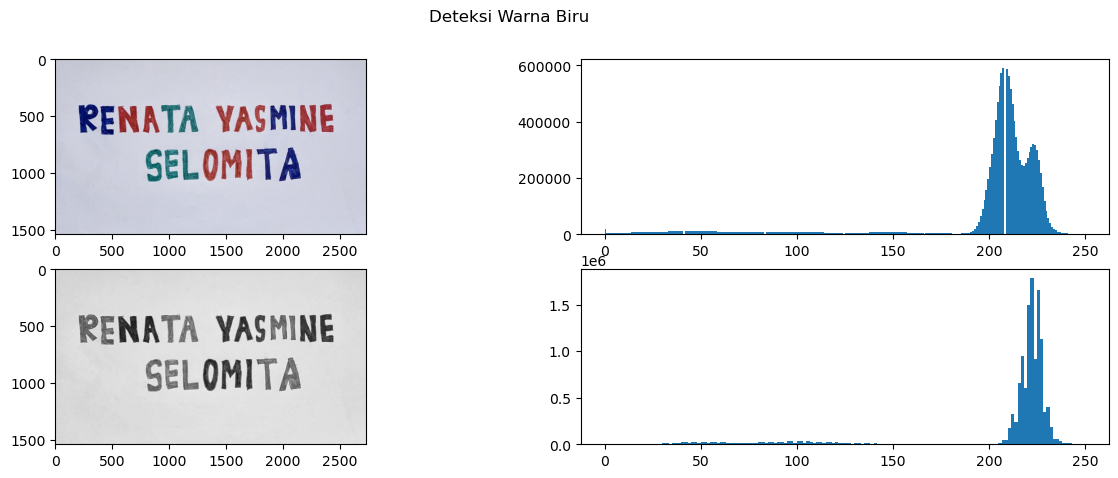

In [9]:
channel_blue = img[:,:,2]
citra_biru = cv2.merge([channel_blue, channel_blue, channel_blue])

fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(), 256, [0,250])
axs[1,0].imshow(citra_biru)
axs[1,1].hist(citra_biru.ravel(), 150, [0,250])

fig.suptitle("Deteksi Warna Biru")

plt.show()

# RANGKUMAN MENDETEKSI WARNA

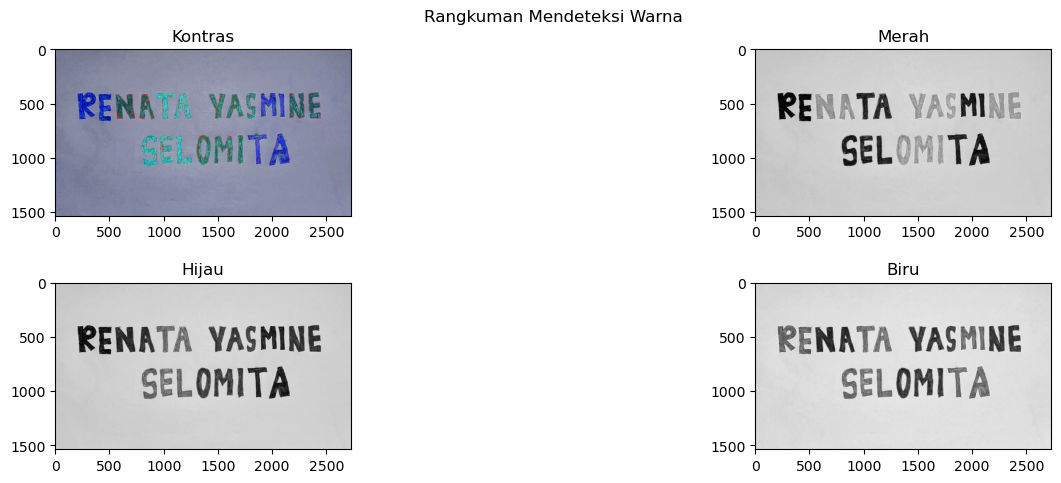

In [10]:
alpha = 1.9
citra_kontras = np.zeros((baris, kolom, 3))

for x in range(baris):
    for y in range(kolom):
        gmx = img[x,y] * alpha
        citra_kontras[x,y]= gmx

citra_kontras = citra_kontras.astype(np.uint8)

channel_red = img[:,:,0]
red_image = cv2.merge([channel_red, channel_red, channel_red])

channel_green = img[:,:,1]
green_image = cv2.merge([channel_green, channel_green, channel_green])

channel_blue = img[:,:,2]
blue_image = cv2.merge([channel_blue, channel_blue, channel_blue])

fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0, 0].set_title('Kontras')
axs[0,0].imshow(citra_kontras)
axs[0, 1].set_title('Merah')
axs[0,1].imshow(red_image)
axs[1, 0].set_title('Hijau')
axs[1,0].imshow(green_image)
axs[1, 1].set_title('Biru')
axs[1,1].imshow(blue_image)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Rangkuman Mendeteksi Warna")
plt.show()

# OPERASI MEMBAGI WARNA SESUAI DENGAN TINGKAT WARNANYA 

In [11]:
for x in range(baris):
    for y in range(kolom):
        max1=0
        max2=0
        for z in range(3):
            if(max1==0):
                max1=img[x,y,z]
                imax1=z
            elif(max1<img[x,y,z]):
                max2 = max1
                imax2 = imax1
                
                max1=img[x,y,z]
                imax1=z
            elif(max2<img[x,y,z]):
                max2=img[x,y,z]
                imax2=z
        if((img[x,y,imax1]-img[x,y,imax2])>50):
            for z in range(3):
                if(z!=imax1):
                    img[x,y,z]=0

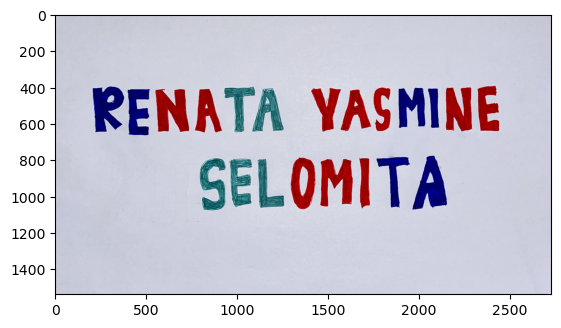

In [12]:
plt.imshow(img,cmap='gray')

# MENGUBAH WARNA GAMBAR DEFAULT KE GRAY

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 

# MENCARI AMBANG BATAS CITRA

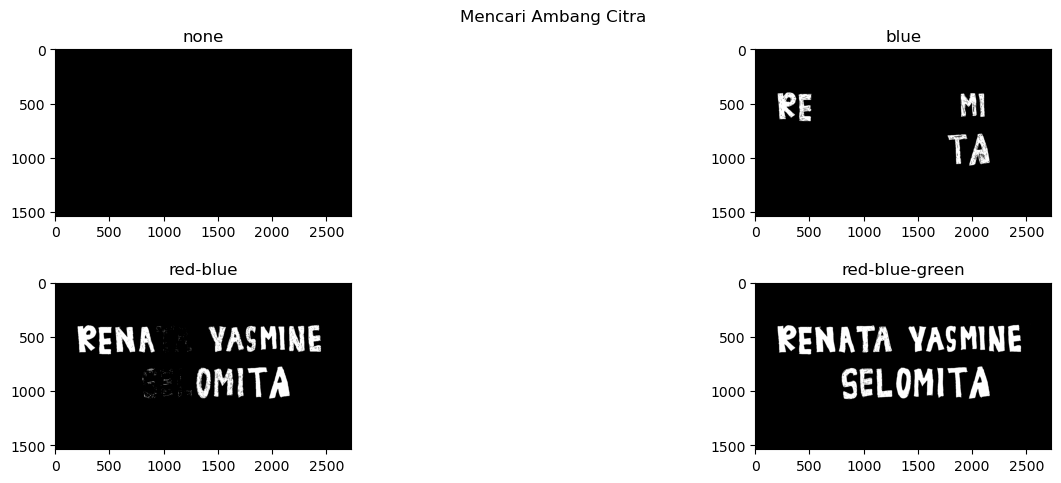

In [22]:
fig, axs = plt.subplots (2,2, figsize=(15,5))

(threshold, binary1) = cv2.threshold(gray,0,0,cv2.THRESH_BINARY) 
axs [0,0].set_title("none")
axs [0,0].imshow(binary1, cmap="gray")

(threshold, binary2) = cv2.threshold (gray, 15,256,cv2.THRESH_BINARY) 
axs [0,1].set_title("blue")
axs [0,1].imshow(binary2, cmap="binary")

(threshold, binary3) = cv2.threshold (gray, 55,256,cv2.THRESH_BINARY)
axs [1,0].set_title("red-blue") 
axs [1,0].imshow(binary3, cmap="binary")

(threshold, binary4) = cv2.threshold (gray, 150, 256, cv2.THRESH_BINARY)
axs [1,1].set_title("red-blue-green")
axs [1,1].imshow(binary4, cmap="binary")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Mencari Ambang Citra")
plt.show()